Nama : Fathan Naufal Rosidin <br>
NIM : 211351054 <br>
Kelas :Informatika Pagi B

# import Dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fathannr","key":"251785e6198dd3e76baec0bac05dba0f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 54.4MB/s]


In [ ]:
# UNZIP

!mkdir bike-sharing-dataset
!unzip bike-sharing-dataset.zip -d bike-sharing-dataset
!ls bike-sharing-dataset

Archive:  bike-sharing-dataset.zip
  inflating: bike-sharing-dataset/Readme.txt  
  inflating: bike-sharing-dataset/day.csv  
  inflating: bike-sharing-dataset/hour.csv  
day.csv  hour.csv  Readme.txt


# import library yang digunakan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Data Discovery

In [ ]:
df = pd.read_csv('/content/bike-sharing-dataset/day.csv')

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df.shape

(731, 16)

In [ ]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,Jan,0,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,Jan,0,Sun,0,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# EDA

<ipython-input-13-f327079e388e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


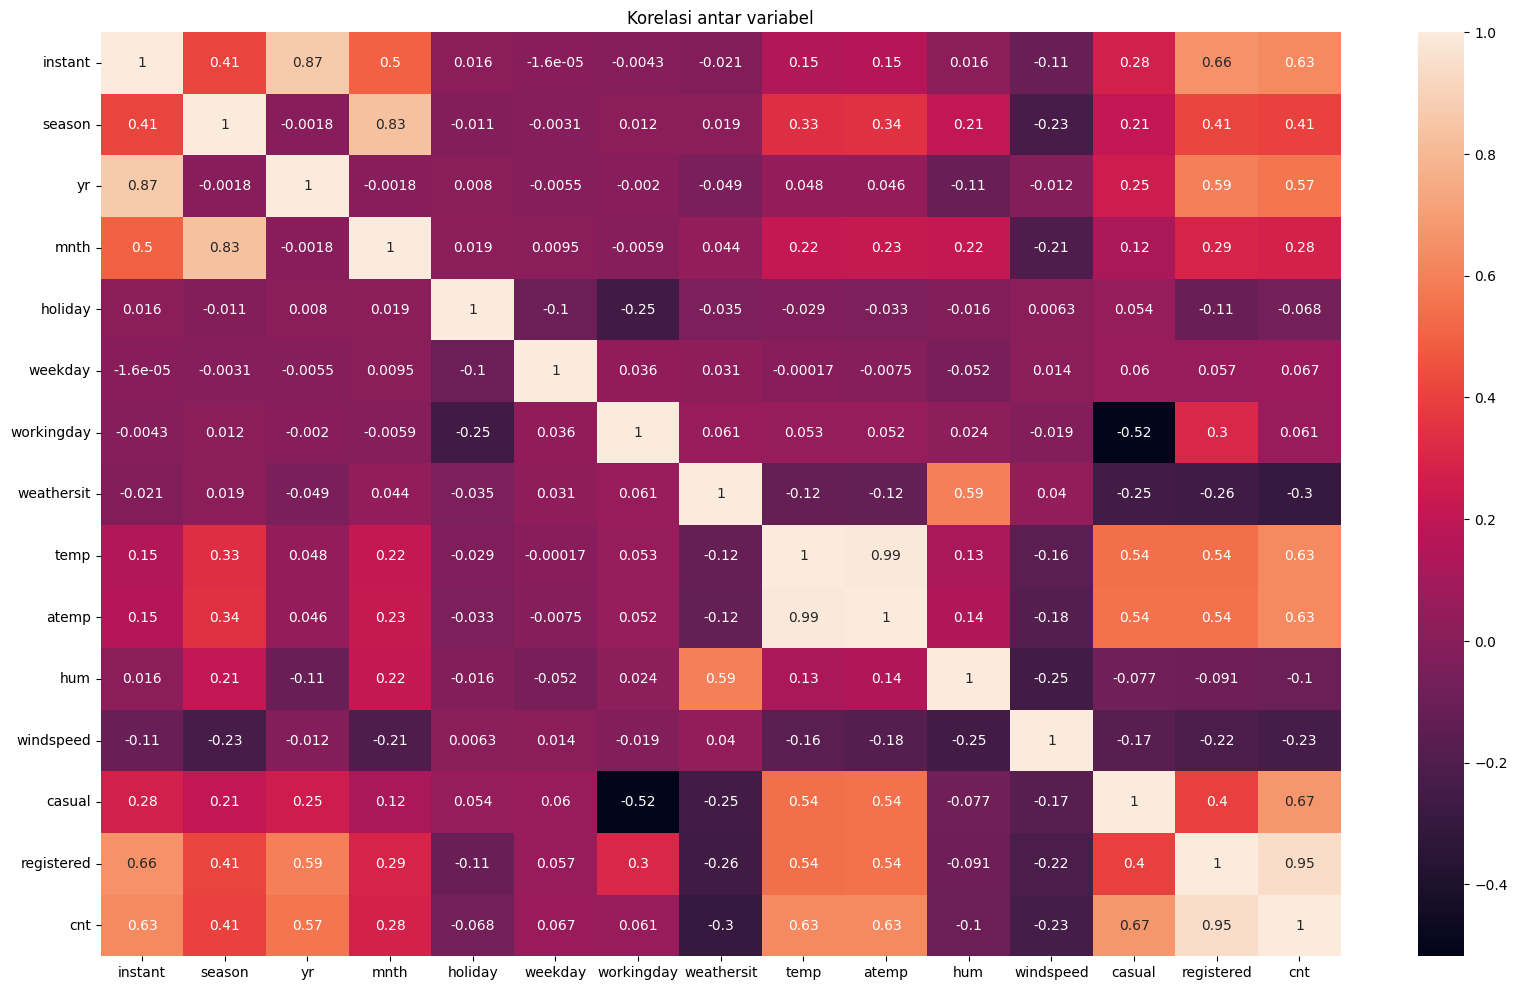

In [ ]:
#mengecek korelasi antar variabel

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot = True)
plt.title("Korelasi antar variabel")
plt.show()

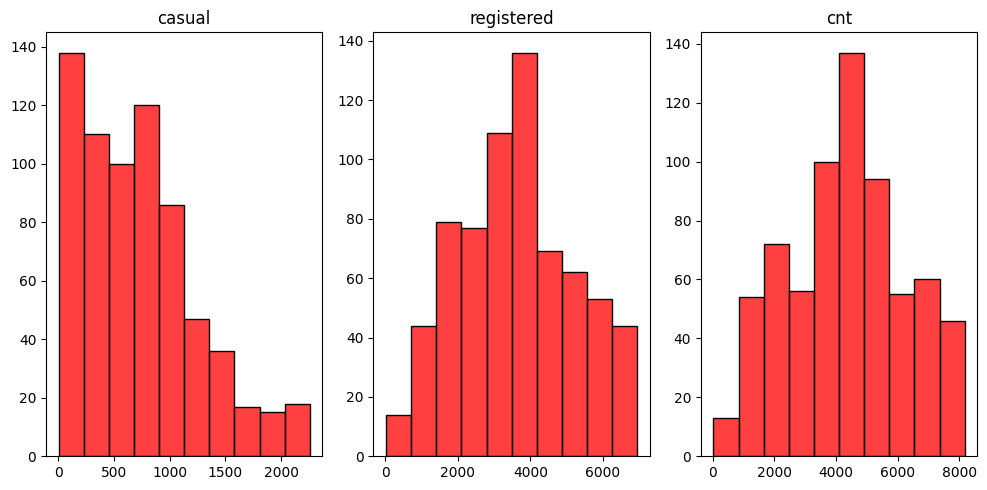

In [ ]:
#Histogram

columns = ['casual', 'registered', 'cnt']

fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.histplot(x=df[columns[i]], ax=ax, bins=10, color='red')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

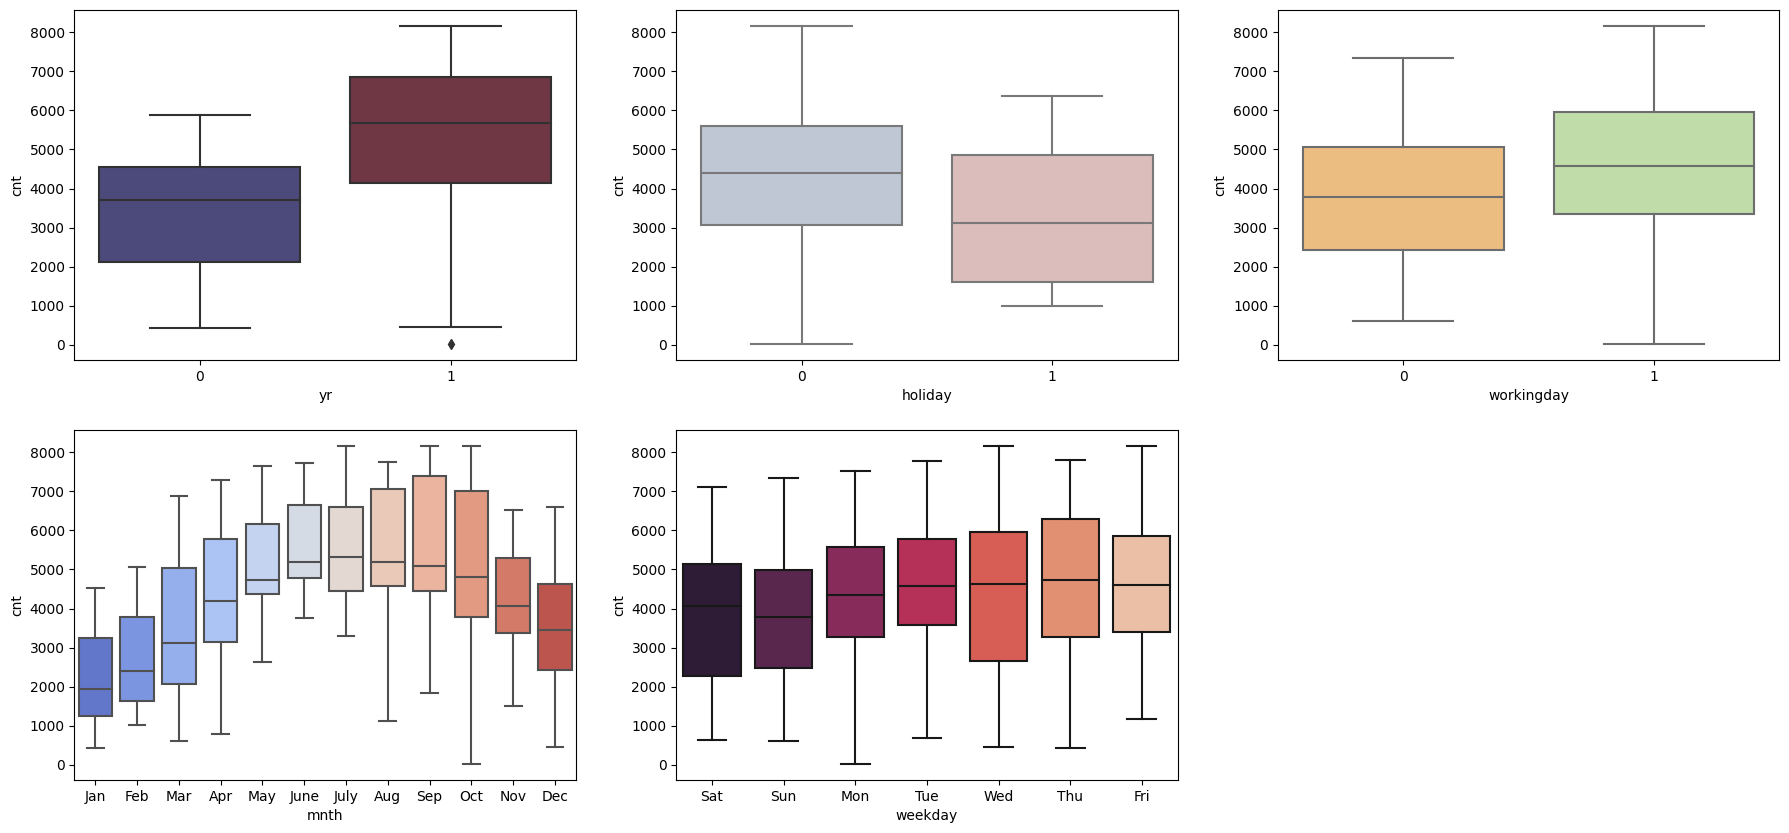

In [ ]:
# memahami data menggunakan boxplot
plt.figure(figsize=(22, 10))

plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = df,palette="icefire")

plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df,palette="vlag")

plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df,palette="Spectral")

plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = df,palette="coolwarm")


plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df,palette="rocket")

plt.show()

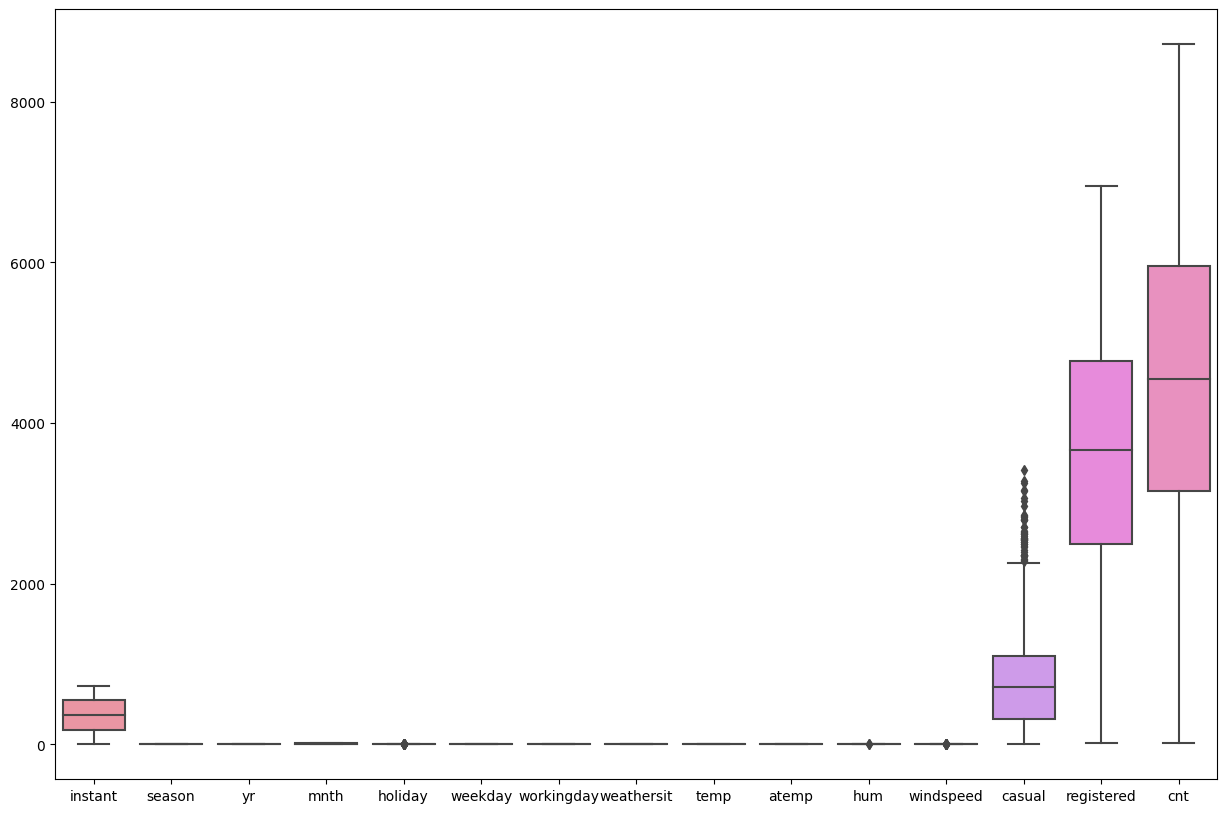

In [ ]:
#Memeriksa outlier pada data

sns.boxplot(df)
fig=plt.gcf()
fig.set_size_inches(15,10)

In [ ]:
#Melihat data sepeda yang di sewa berdasarkan musim menggunakan barplot

su=df.loc[df['season'] == 'summer', 'cnt'].sum()
sp=df.loc[df['season'] == 'spring', 'cnt'].sum()
fa=df.loc[df['season'] == 'fall', 'cnt'].sum()
wi=df.loc[df['season'] == 'winter', 'cnt'].sum()

data = {
  "season": ['summer', 'spring', 'fall', 'winter'],
  "cnt": [su, sp, fa,wi]
}

#load data into a DataFrame object:
df0 = pd.DataFrame(data)

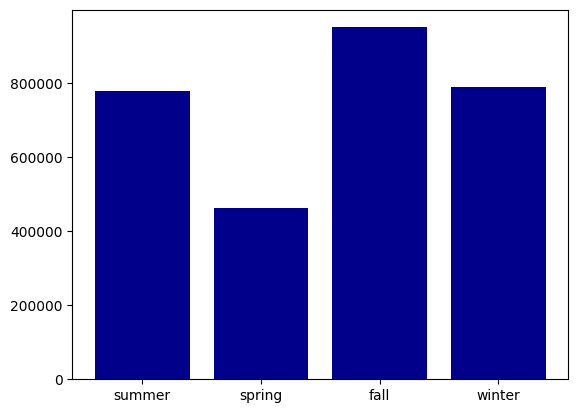

   season     cnt
0  summer  778246
1  spring  463512
2    fall  951468
3  winter  788881


In [ ]:
plt.bar(x='season',height='cnt',data=df0,color='darkblue')
plt.show()
print(df0)

# Preprocessing

In [85]:
#Karena dilihat dari boxplotnya kolom casual memiliki outlier yang banyak, maka akan dilakukan drop data

Q1 = (df['casual']).quantile(0.25)
Q3 = (df['casual']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = df['casual'] < minimum
kondisi_more_than = df['casual'] > maximum

df.drop(df[kondisi_lower_than].index, inplace=True)
df.drop(df[kondisi_more_than].index, inplace=True)

In [86]:
#karena saya akan mengcluster kolom casual, dan registered saja maka akan dilakukan drop data

df2 = df.drop(['dteday','season','yr','instant','mnth','holiday','weekday', 'workingday','weathersit','temp','atemp','hum','windspeed'], axis=1)
df2.head()

,casual,registered,cnt
0,331,654,985
1,131,670,801
2,120,1229,1349
3,108,1454,1562
4,82,1518,1600


# modeling

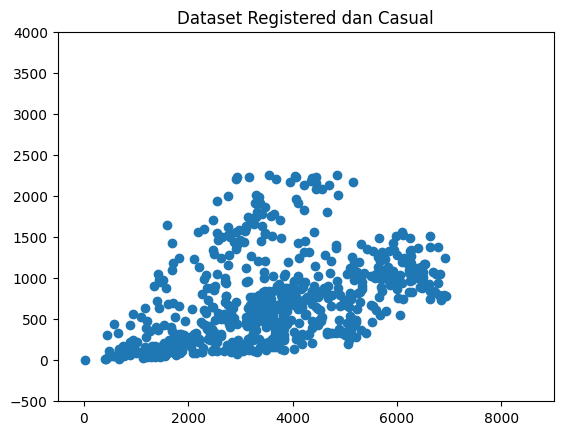

In [ ]:
#Melakukan clustering pada Kolom Registered dan Casual, dengan menggunakan K-Means

x1 = df["registered"]
x2 = df["casual"]
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# Visualizing the data
plt.plot()
plt.xlim([-500, 9000])
plt.ylim([-500, 4000])
plt.title('Dataset Registered dan Casual')
plt.scatter(x1, x2)
plt.show()

In [ ]:
#lalu saya melakukan elbow

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1419.7310256308206
2 : 958.6152332844738
3 : 649.578274295463
4 : 564.6468983577068
5 : 495.8586777130354
6 : 435.0713981676813
7 : 405.9935055277616
8 : 375.4784525273955
9 : 343.3345992435909


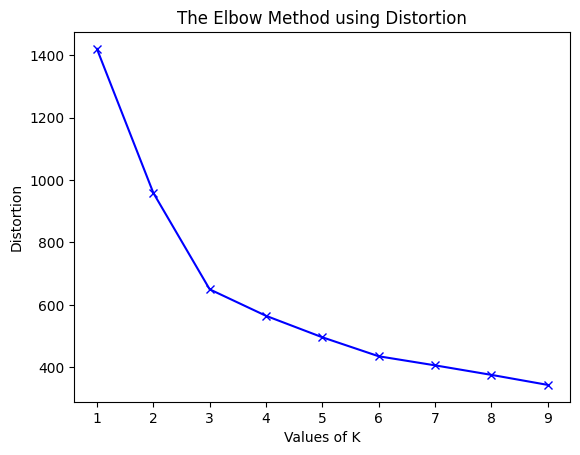

In [80]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

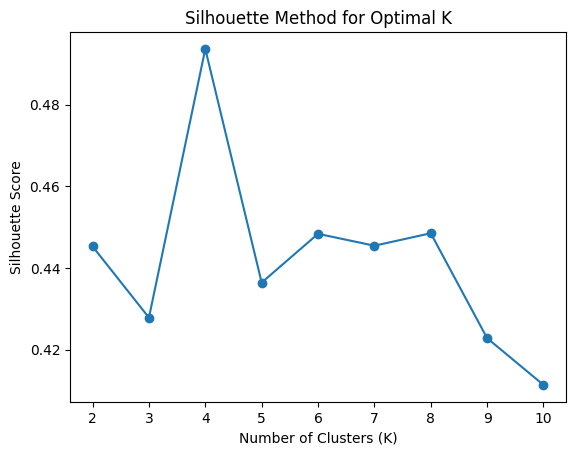

In [84]:
# Standarisasi (Opsional tapi terkadang di sarankan)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

# Mengurangi dimensi tinggi dengan Principal Component Analysis (PCA) (Opsional tapi terkadang dapat membantu)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Untuk set jumlah cluster
cluster_range = range(2, 11)

# untuk menyimpan skor kluster pada setiap jumlah kluster
silhouette_scores = []

for n_clusters in cluster_range:
    # untuk Fit model K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)  # Untuk mengurangi dimensi tinggi data kita

    # Kalkulasi skor silhouette
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

Ditemukan skor silhouette tertinggi adalah kisaran 0.48 pada jumlah kluster 4. Maka kita akan menggunakan Jumlah kluster 4 pada K-Means nya.

# Visualisasi hasil algoritma

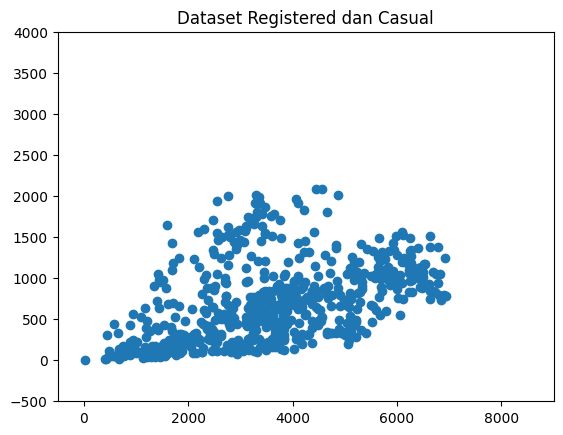

In [88]:

df3={'x':df["registered"],'y':df["casual"]}
plt.xlim([-500, 9000])
plt.ylim([-500, 4000])
plt.scatter(df3["x"], df3["y"])
plt.title('Dataset Registered dan Casual')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1463.40397351  273.32450331]
 [5835.26797386  974.87581699]
 [4081.01932367  785.14492754]
 [2958.38068182  851.92045455]]


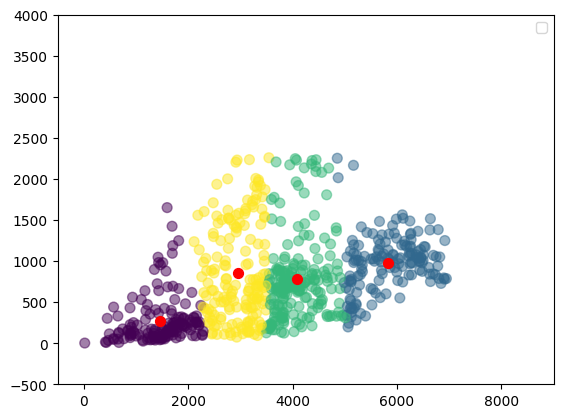

In [81]:
#Melakukan K-mean clustering


kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)


fig,ax=plt.subplots()
plt.scatter(df3['x'], df3['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlim([-500, 9000])
plt.ylim([-500, 4000])
ax.legend()
plt.show()

# save model (pickle)

In [87]:
kmeans = KMeans(n_clusters=4).fit(X)

with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

with open('kmeans_model.pkl', 'rb') as file:
    loaded_kmeans = pickle.load(file)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
